In [33]:
import geopandas
import matplotlib.pyplot as plt
import pandas
import libpysal
from tobler.util import h3fy
from tobler.area_weighted import area_interpolate
%load_ext watermark
%watermark -v -a "author: eli knaap" -d -u -p tobler,cenpy,geopandas

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
Author: author: eli knaap

Last updated: 2022-03-22

Python implementation: CPython
Python version       : 3.9.10
IPython version      : 7.32.0

tobler   : 0.9.0
cenpy    : 1.0.0.post4
geopandas: 0.10.2



In [34]:
import contextily as ctx
from cenpy import products

In [35]:
dc = geopandas.read_file('../Data/Facilities/DemoCairoResults.gpkg', layer='count').to_crs("EPSG:3857") #Polygon

In [36]:
dc_hex = h3fy(dc)

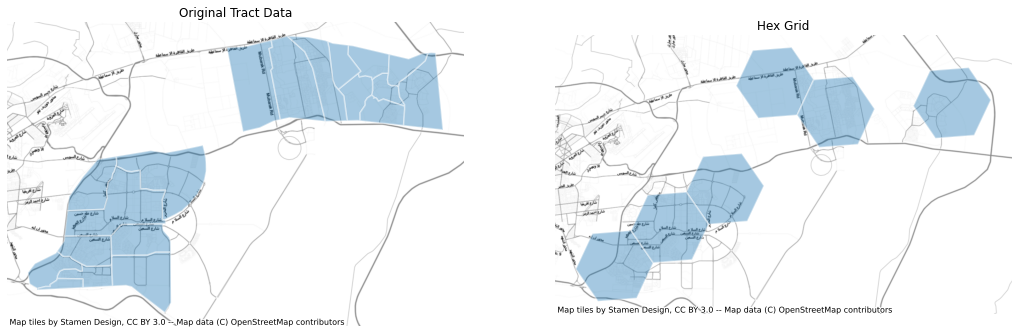

In [37]:
fig, axs = plt.subplots(1,2, figsize=(18,10))
axs=axs.flatten()

dc.plot(ax=axs[0], alpha=0.4, linewidth=1.6, edgecolor='white')
dc_hex.plot(ax=axs[1], alpha=0.4, linewidth=1.6, edgecolor='white')

axs[0].set_title('Original Tract Data')
axs[1].set_title('Hex Grid')

for i,_ in enumerate(axs):
    ctx.add_basemap(axs[i], source=ctx.providers.Stamen.TonerLite)
    axs[i].axis('off')

In [46]:
dc_hex_large = h3fy(dc, resolution=6)
dc_hex_small = h3fy(dc, resolution=8)

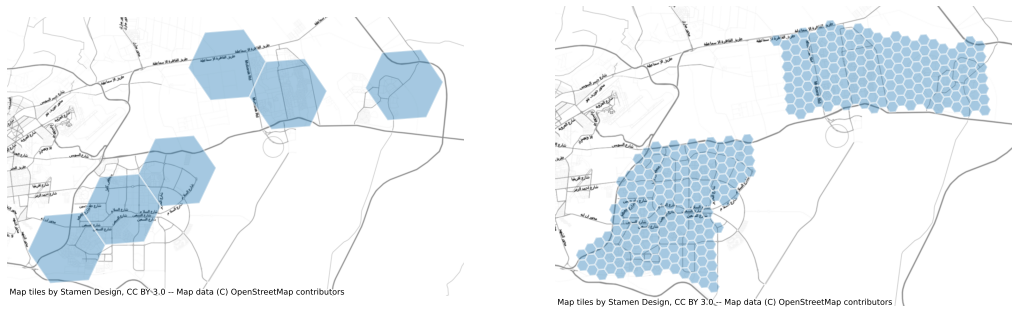

In [48]:
fig, axs = plt.subplots(1,2, figsize=(18,10))

dc_hex_large.plot(ax=axs[0], alpha=0.4, linewidth=1.6, edgecolor='white')
dc_hex_small.plot(ax=axs[1], alpha=0.4, linewidth=1.6, edgecolor='white')

for ax in axs:
    ctx.add_basemap(ax=ax, source=ctx.providers.Stamen.TonerLite)
    ax.axis('off')

In [49]:
dc_hex_clipped = h3fy(dc, resolution=8, clip=True)

(3489452.427184286, 3538599.6557073276, 3496754.704708726, 3528822.1242651325)

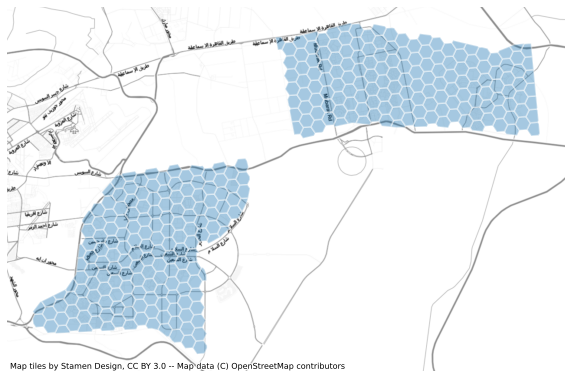

In [50]:
fig, ax = plt.subplots(figsize=(10,10))

dc_hex_clipped.plot(ax=ax, alpha=0.4, linewidth=1.6, edgecolor='white')
ctx.add_basemap(ax=ax, source=ctx.providers.Stamen.TonerLite)
ax.axis('off')

In [53]:
dc_hex_interpolated = area_interpolate(source_df=dc, target_df=dc_hex_clipped, intensive_variables=['count'])

C:\Users\Youss\AppData\Roaming\Python\Python39\site-packages\mapclassify\classifiers.py:238: UserWarning: Warning: Not enough unique values in array to form k classes
  Warn(
C:\Users\Youss\AppData\Roaming\Python\Python39\site-packages\mapclassify\classifiers.py:241: UserWarning: Warning: setting k to 4
  Warn("Warning: setting k to %d" % k_q, UserWarning)


Text(0.5, 0.98, 'Spatial Interpolation with the PySAL $\\mathtt{tobler}$ package')

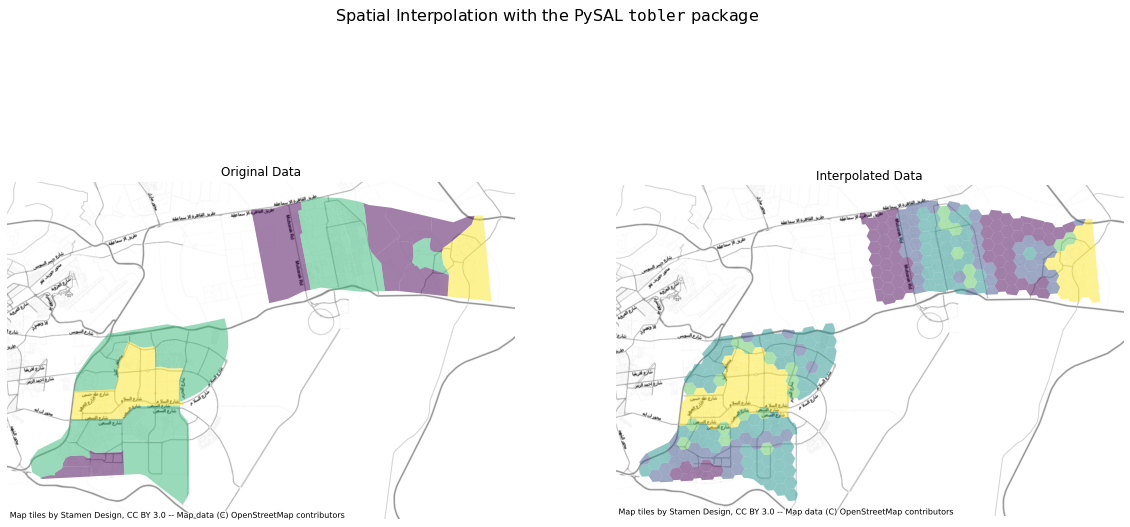

In [54]:
fig, axs = plt.subplots(1,2, figsize=(20,10))
dc.plot('count', scheme='quantiles', alpha=0.5, ax=axs[0])

dc_hex_interpolated.plot('count', scheme='quantiles', alpha=0.5, ax=axs[1])

axs[0].set_title('Original Data')
axs[1].set_title('Interpolated Data')
           
for ax in axs:
    ctx.add_basemap(ax=ax, source=ctx.providers.Stamen.TonerLite)
    ax.axis('off')
plt.suptitle('Spatial Interpolation with the PySAL $\mathtt{tobler}$ package', fontsize=16)